## Fashion Mnist using tensorflow to buiding ANN

- Fashion Mnist dataset: Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
- Goal: Classify grayscale fashion-mnist images into 10 classes

In [63]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
import random
import keras.layers as layers
from typing import Optional


# Common to check version of libs
print(f"Tensorflow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

Tensorflow version: 2.15.0
Keras version: 2.15.0


# 1. Load fashion mnist

In [2]:
# this is how you can get the dataset from tensorflow
# the oad_data() return two tuples include things as below
(X_train, y_train), (X_test, y_test) =  keras.datasets.fashion_mnist.load_data()

In [3]:
X_train.dtype, y_train.dtype

(dtype('uint8'), dtype('uint8'))

In [4]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
X_train[0],

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

In [6]:
y_train[16]

1

In [7]:
# The class name contain the true text value corresponding to the number was encode in y_train by mapping the list index to the encoded number.
class_name = ['T-shirt/top', "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankie boot"]

class_name[y_train[16]]

'Trouser'

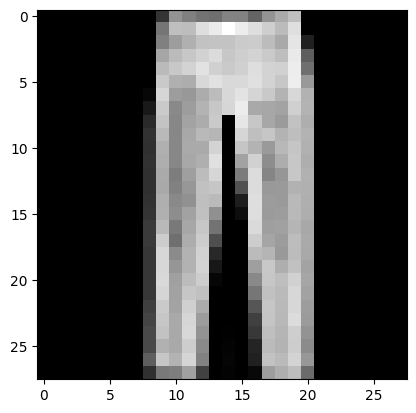

In [8]:
plt.imshow(X_train[16], cmap='gray')
plt.show()

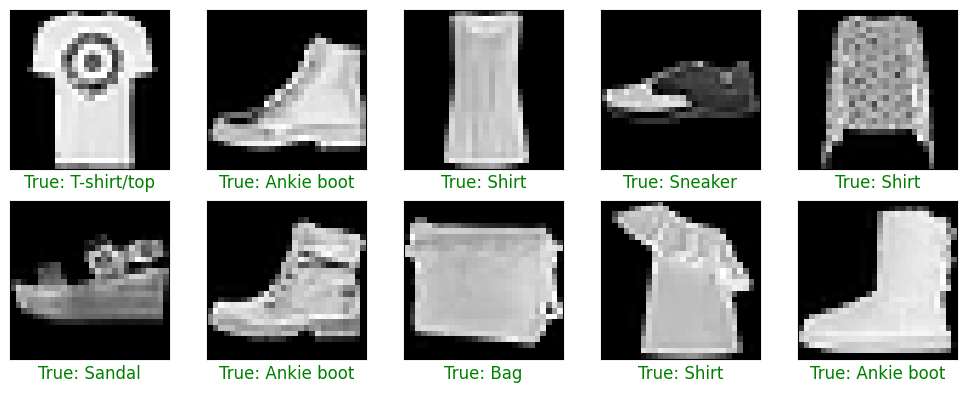

In [64]:
# Define a def for plotting 10 Images randomly from this dataset cause we cannot see all images in one frame,
def plot_data(X_data: np.ndarray, y_data: np.ndarray, y_proba: Optional[np.ndarray]=None) -> None:
    n_rows, n_cols = 2,5

    len_x = X_data.shape[0]
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 4))
    for idx in range(n_rows * n_cols):
        ax = axes[idx // n_cols, idx % n_cols ]

        img_idx = random.randint(0, len_x)
        ax.imshow(X_data[img_idx, ], cmap="gray")
        ax.set(xticks=[], yticks=[])

        color = 'green'
        true_label_str = f"True: {class_name[y_data[img_idx]]}"

        if y_proba is not None:
            predicted_idx = np.argmax(y_proba[img_idx])
            predicted_label = class_name[predicted_idx]
            color = 'red' if predicted_idx != y_data[img_idx] else color
            predicted_label_string = f"\nPredicted: {predicted_label}"

        img_tile = true_label_str if y_proba is None else true_label_str + predicted_label_string

        ax.set_xlabel(img_tile, color=color, fontsize=12)

    plt.tight_layout()
    plt.show()

# Random 10 images from train set
plot_data(X_train, y_train)

# 2. Image preprocessing
- Reshaping it into a shape that model expects and scaling to the [0,1] scale, this step also known as data normalization
- Transform from `int8` to `float32` because in neural network, everything was computed in float form


In [10]:
X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

X_train.dtype, X_train.shape

(dtype('float32'), (60000, 28, 28))

In [11]:
X_train[16]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.20784314,
        0.57254905, 0.49803922, 0.4509804 , 0.43529412, 0.50980395,
        0.5058824 , 0.39215687, 0.5764706 , 0.6627451 , 0.74509805,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.45882353,
        0.74509805, 0.7372549 , 0.8666667 , 0.91764706, 0.99607843,
        0.9254902 , 0.8666667 , 0.8039216 , 0.7294118 , 0.87058824,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.49803922,
        0.6117647 , 0.6862745 , 0.75686276, 0.7647059 , 0.7647059 ,
        0.7921569 , 0.7960

In [12]:
# Expand Dimession chanel
# Turn image shape (60000, 28, 28) -> (60000, 28, 28, 1)

X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

X_test.shape, X_test.dtype

((10000, 28, 28, 1), dtype('float32'))

In [17]:
X_train.shape, X_train.dtype

((60000, 28, 28, 1), dtype('float32'))

In [18]:
# convert class into binary class matrices 2 => [0,0,1,0,0...] aslo known was Onehot encoding
# 1               : sparse_categorical_crossentropy
# [0,0,1,0,0,...] : categorical_crossentropy
y_train_onehot = keras.utils.to_categorical(y_train, len(class_name))
y_test_onehot = keras.utils.to_categorical(y_test, len(class_name))


In [23]:
y_train[16] ,y_train_onehot[16]

(1, array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32))

# Neural network

In [28]:
# define input shape to tell model which dimension is image
input_shape = (28,28,1)

In [34]:
model = keras.models.Sequential([
    layers.Flatten(input_shape=input_shape), # turn (28,28,1) into one dimension vector (28*28) = 784
    layers.Dense(512, activation='relu'), # avoid linear model
    layers.Dense(256, activation='relu'),
    layers.Dense(len(class_name), activation='softmax') # Calculated probability
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [45]:
epochs = 10
batch_size = 128
history = model.fit(X_train, y_train_onehot,
                    epochs=epochs,
                    batch_size = batch_size,
                    validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 6s 15ms/step - loss: 0.2210 - accuracy: 0.9158 - val_loss: 0.3514 - val_accuracy: 0.8845
Epoch 2/10
422/422 [==============================] - 6s 14ms/step - loss: 0.2138 - accuracy: 0.9194 - val_loss: 0.3447 - val_accuracy: 0.8878
Epoch 3/10
422/422 [==============================] - 7s 16ms/step - loss: 0.2076 - accuracy: 0.9203 - val_loss: 0.3401 - val_accuracy: 0.8943
Epoch 4/10
422/422 [==============================] - 8s 18ms/step - loss: 0.2000 - accuracy: 0.9240 - val_loss: 0.3726 - val_accuracy: 0.8983
Epoch 5/10
422/422 [==============================] - 7s 16ms/step - loss: 0.1944 - accuracy: 0.9258 - val_loss: 0.3847 - val_accuracy: 0.8907
Epoch 6/10
422/422 [==============================] - 6s 13ms/step - loss: 0.1891 - accuracy: 0.9286 - val_loss: 0.3678 - val_accuracy: 0.8872
Epoch 7/10
422/422 [==============================] - 7s 16ms/step - loss: 0.1845 - accuracy: 0.9289 - val_loss: 0.4010 - val_accuracy: 0.8937

In [48]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [52]:
train_loss, val_loss = history_dict['loss'], history_dict['val_loss']
train_acc, val_acc = history_dict['accuracy'], history_dict['val_accuracy']


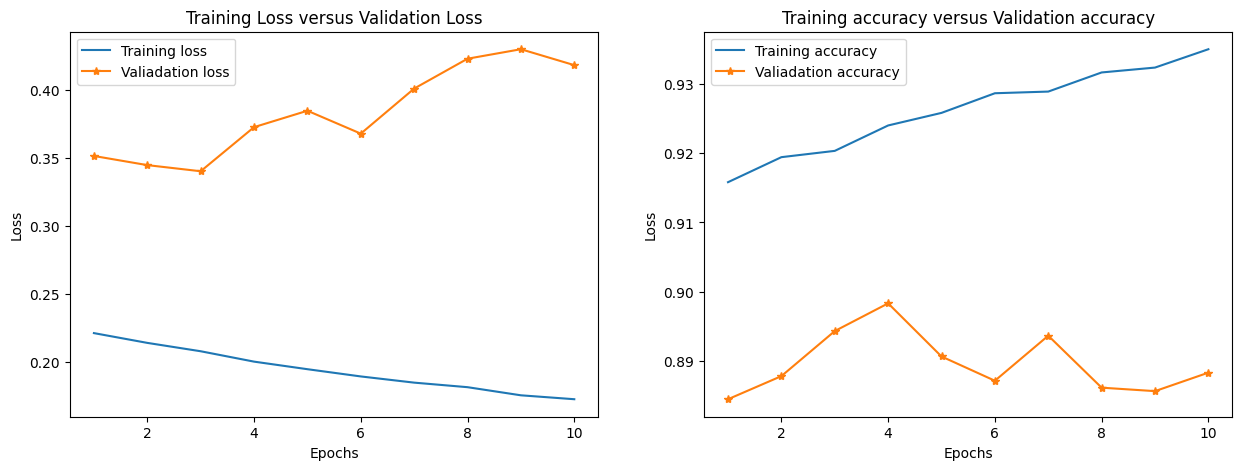

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
epoch_runs = [idx + 1 for idx in range(epochs)]

ax1.plot(epoch_runs, train_loss, label="Training loss")
ax1.plot(epoch_runs, val_loss, label="Valiadation loss", marker="*")
ax1.set(title="Training Loss versus Validation Loss", xlabel="Epochs", ylabel="Loss")
ax1.legend()

ax2.plot(epoch_runs, train_acc, label="Training accuracy")
ax2.plot(epoch_runs, val_acc, label="Valiadation accuracy", marker="*")
ax2.set(title="Training accuracy versus Validation accuracy", xlabel="Epochs", ylabel="Loss")
ax2.legend()
plt.show()


# 4. Model Evaluation

In [60]:
score = model.evaluate(X_test, y_test_onehot)

313/313 [==============================] - 2s 6ms/step - loss: 0.4342 - accuracy: 0.8862


In [62]:
print(f"Test loss:  {score[0]:.4f}")
print(f"Test accuracy: {score[1]:.4f}")

Test loss:  0.4342
Test accuracy: 0.8862


# 5. Prediction

In [65]:
X_sample = X_test[: 5]
y_proba = model.predict(X_sample)


1/1 [==============================] - 0s 165ms/step


In [66]:
y_proba.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        1.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.019, 0.   , 0.   , 0.   , 0.   , 0.   , 0.981, 0.   , 0.   ,
        0.   ]], dtype=float32)

In [67]:
prediction = np.argmax(y_proba, axis=1)


In [69]:
[class_name[pred] for pred in prediction]

['Ankie boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt']

In [70]:
y_proba = model.predict(X_test)


313/313 [==============================] - 2s 7ms/step


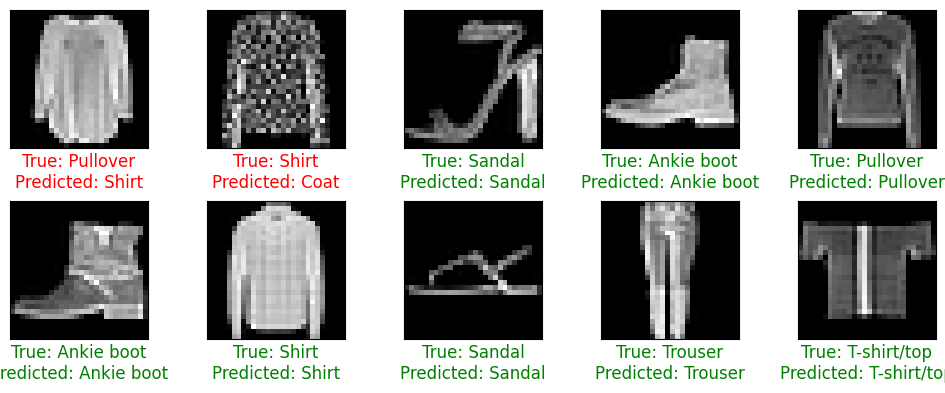

In [72]:
plot_data(X_test, y_test, y_proba)